<tr>
<td style="text-align: center;">
    <div style="display: inline-block;text-align: center">
        <img src="Logo_CentraleSupélec.png" style="width: 30%;">
    </div>
</td>
</tr>

<h1 style="font-family: Georgia, Arial; font-size: 36px;">Reinforcement Learning Project </h1>
<p style="font-size: 24px;"></p>
<p style="font-size: 24px;">Members: Francisco García, Samer Lahoud, Marouane Maamar, Ayman</p>



# Understanding the environment

Before all, experimenting wit the environment:

In [1]:
import gymnasium as gym
from matplotlib import pyplot as plt
import pprint
%matplotlib inline

Plotting the output

C:\Users\Francisco García\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(
C:\Users\Francisco García\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(
C:\Users\Francisco García\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type

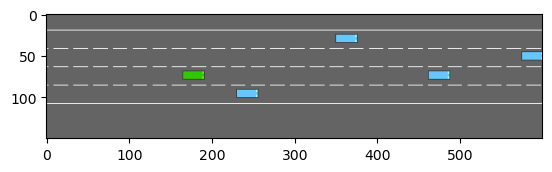

In [2]:
env = gym.make('highway-v0', render_mode='rgb_array')
env.reset()
for _ in range(3):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()

Exploring possible commands

In [3]:
env = gym.make("highway-v0", render_mode='rgb_array')
pprint.pprint(env.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 4,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 50,
 'vehicles_density': 1}


C:\Users\Francisco García\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.config to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.config` for environment variables or `env.get_wrapper_attr('config')` that will search the reminding wrappers.
  logger.warn(


In [4]:
env.config['vehicles_density']

1

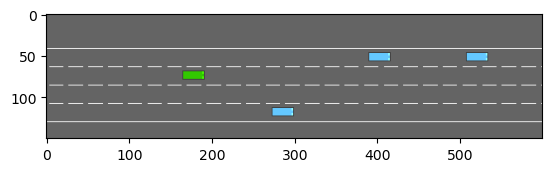

In [5]:
env.config["lanes_count"] = 4
env.reset()
plt.imshow(env.render())
plt.show()

In [6]:
import gymnasium as gym

env = gym.make("highway-v0")

Let's see how is the ovservation of the environment and the information that is recived

In [7]:
observation, info = env.reset()
print(observation)
print(info) # We will not use this

[[ 1.          0.89025605  0.75        0.3125      0.        ]
 [ 1.          0.09546012 -0.75       -0.02580946  0.        ]
 [ 1.          0.19255824 -0.25       -0.02870953  0.        ]
 [ 1.          0.2862246  -0.5        -0.0343262   0.        ]
 [ 1.          0.38946423 -0.75       -0.0198283   0.        ]]
{'speed': 25, 'crashed': False, 'action': 0, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 1.0, 'high_speed_reward': 0.5, 'on_road_reward': 1.0}}


In the matrix of observation we realized playing with the environment that each row represent a car and the columns values such as:


- **Column 0:** 1 If the entity exists, 0 otherwise.
  
- **Column 1:** column representing the relative distance on the **x-axis**, only cars that are ahead of the main vehicle are displayed.
  
- **Column 2:** Column representing the **y-axis** from top to bottom: 0 is the highest and 1 is the lowest distance.
  
- **Column 3:** vehicle speed.
  
- **Column 4:** vertical speed of the vehicle (and then if the track is changed).

Also we have information of the agent car in info, whicho looks like this:

```python
info = {
    'speed': 29.999999999981878, 
    'crashed': False, 
    'action': 2,
    'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': 0.9946860962559725, 'on_road_reward': 1.0}
}
```
About the reward:

- 'right_lane_reward' : rises between 0, 1 each time you move to the right (down in the dibble), counts for 7% of the total reward. 

- 35% of the reward is speed.

- 'collision_reward': 1.0 when crashed, otherwise 0.


So To have a good reward we will like not to have collision and to go the fastest possible and the most to the right.


In [9]:
print([ m for m in dir(env) if not m.startswith('_')]) # take a look at the available methods of object env
print(env.action_space)
print(env.observation_space)

['action_space', 'class_name', 'close', 'env', 'get_wrapper_attr', 'has_reset', 'metadata', 'np_random', 'observation_space', 'render', 'render_mode', 'reset', 'reward_range', 'spec', 'step', 'unwrapped', 'wrapper_spec']
Discrete(5)
Box(-inf, inf, (5, 5), float32)


After playing a bit we know that the 5 actions are:

- Action 0 : do nothing

- Action 1 : goes to left (up in draw)

- Action 2 : goes to right (down in draw)

- Action 3 : accelerate (max is 30, so it converge to 29.99)

- Action 4 : decelerate (min is 20, so it converge to 20.001)

```python
ACTIONS_ALL = {
    0: 'LANE_LEFT',
    1: 'IDLE',
    2: 'LANE_RIGHT',
    3: 'FASTER',
    4: 'SLOWER'
}
```

In the following we play with the environment, moving the agent

In [10]:
env = gym.make("highway-v0", render_mode='rgb_array')

# Reset the environment to get the initial state
state = env.reset()

# Now, env.render() will return pixel data
pixel_data = env.render()

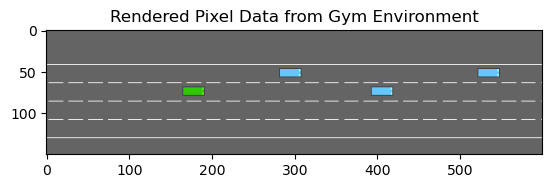

In [11]:
plt.imshow(pixel_data)
plt.title("Rendered Pixel Data from Gym Environment")
plt.show()

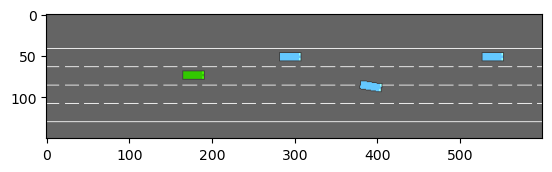

Observation : [[ 1.          1.          0.25        0.26068053  0.        ]
 [ 1.          0.10624425 -0.25        0.00963116  0.        ]
 [ 1.          0.19514434  0.17002346 -0.0145604   0.03919455]
 [ 1.          0.328362   -0.25        0.03025704  0.        ]
 [ 1.          0.4244611   0.          0.01494697  0.        ]]
Reward : 0.7116739868390409
Terminated : False
info : {'speed': 20.8544411731307, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.3333333333333333, 'high_speed_reward': 0.08544411731306986, 'on_road_reward': 1.0}}


In [12]:
observation, reward, terminated, truncated, info = env.step(4)
plt.imshow(env.render())
plt.show()
print("Observation : {}".format(observation))
print("Reward : {}".format(reward))

print("Terminated : {}".format(terminated))
print("info : {}".format(info))

Understanding other parameters in of the ``env``.

In [13]:
import gymnasium as gym

env = gym.make("highway-v0")

# Actions
print("Action Space:", env.action_space)
print("Action Space Type:", type(env.action_space))
if isinstance(env.action_space, gym.spaces.Discrete):
    print("Number of Actions:", env.action_space.n)
elif isinstance(env.action_space, gym.spaces.Box):
    print("Action Bounds:", env.action_space.low, env.action_space.high)

# States
print("\nObservation Space:", env.observation_space)
print("Observation Space Type:", type(env.observation_space))
if isinstance(env.observation_space, gym.spaces.Discrete):
    print("Number of States:", env.observation_space.n)
elif isinstance(env.observation_space, gym.spaces.Box):
    print("State Bounds:", env.observation_space.low, env.observation_space.high)


Action Space: Discrete(5)
Action Space Type: <class 'gymnasium.spaces.discrete.Discrete'>
Number of Actions: 5

Observation Space: Box(-inf, inf, (5, 5), float32)
Observation Space Type: <class 'gymnasium.spaces.box.Box'>
State Bounds: [[-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]] [[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]


Aplying all the steps in order (from 0 to 4), and see how the car moves and the environment changes

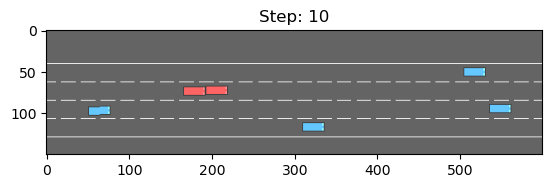

Episode ended after this step. Resetting environment.


In [14]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Create the environment
env = gym.make("highway-v0", render_mode='rgb_array')

# Reset the environment to get the initial state
observation = env.reset()

# Apply action 0 ten times
lista = []
for step in range(10):
    observation, reward, terminated, truncated, info = env.step(step%4)
    #print(env.observation_space)
    lista.append(observation)
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.title(f"Step: {step + 1}")
    plt.show()
    
    # Pause a bit between each frame
    time.sleep(0.1)  # Adjust the sleep time to your liking

    # Check if the episode has ended (either through termination or truncation)
    if terminated or truncated:
        print("Episode ended after this step. Resetting environment.")
        observation = env.reset()

# Close the environment when done
env.close()

# Defining a random agent

First of all we will start with a random agent ``RandomAgent``. Also we use some fonction to make him interact with the environment ``run_one_episode`` and a fonction to evaluate the performancee of the agent ``eval_agent``.

In [15]:
from utilities import * 
from copy import deepcopy

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random

In [24]:
def eval_agent(agent, env, n_sim=5):
    env_copy = deepcopy(env)
    episode_rewards = np.zeros(n_sim)
    for i in range(n_sim):
        state, _ = env_copy.reset()
        reward_sum = 0
        done = False
        while not done: 
            action = agent.get_action(state)
            state, reward, terminated, truncated, _ = env_copy.step(action)
            reward_sum += reward
            done = terminated or truncated
        episode_rewards[i] = reward_sum
    return episode_rewards

In [17]:
class RandomAgent: 
    def __init__(self, observation_space, action_space):
        self.action_space = action_space
        return
    
    def get_action(self, state):
        return self.action_space.sample()
    
    def update(self, *data):
        pass

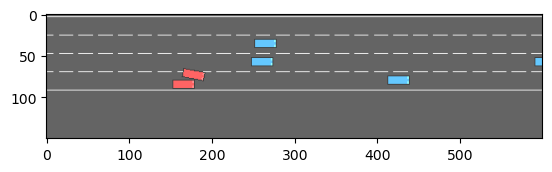

Episode length 4.954199541651012


In [18]:
#env = env = gym.make("CartPole-v1", render_mode='rgb_array')
env = gym.make("highway-v0", render_mode='rgb_array')
agent = RandomAgent(env.observation_space, env.action_space)

def run_one_episode(env, agent, display=True):        
    display_env = deepcopy(env)        
    done = False  
    state, _ = display_env.reset()        

    rewards = 0        

    while not done:        
        action = agent.get_action(state)        
        state, reward, done, _, _ = display_env.step(action)    
        rewards += reward        
        if display:         
            clear_output(wait=True)        
            plt.imshow(display_env.render())        
            plt.show()        
    if display:        
        display_env.close()        
    print(f'Episode length {rewards}')        
    
run_one_episode(env, agent, display=True)         

In [26]:
print(f'Average over 5 runs : {np.mean(eval_agent(agent, env))}') 

# Q net

In this part we define the ``ReplayBuffer`` and the ``Net`` that then our Deep-Q-Agent will use

In [29]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, state, action, reward, terminated, next_state):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = (state, action, reward, terminated, next_state)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.choices(self.memory, k=batch_size)

    def __len__(self):
        return len(self.memory)

With all this finally we can define our Deep Q Learning Agent ``DQN``

In [30]:
class Net(nn.Module):
    """
    Basic neural net.
    """
    def __init__(self, obs_size, hidden_size1, hidden_size2, n_actions):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            #nn.ReLU(),
            #nn.Linear(hidden_size2, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, n_actions)
        )

    def forward(self, x):
        #print(f"Input shape at Net.forward: {x.shape}")
        return self.net(x)

In [31]:
class DQN: 
    def __init__(self,
                action_space,
                observation_space,
                gamma,
                batch_size,
                buffer_capacity,
                update_target_every, 
                epsilon_start, 
                decrease_epsilon_factor, 
                epsilon_min,
                learning_rate,
                ):
        self.action_space = action_space
        self.observation_space = observation_space
        self.gamma = gamma
        
        self.batch_size = batch_size
        self.buffer_capacity = buffer_capacity
        self.update_target_every = update_target_every
        
        self.epsilon_start = epsilon_start
        self.decrease_epsilon_factor = decrease_epsilon_factor # larger -> more exploration
        self.epsilon_min = epsilon_min
        
        self.learning_rate = learning_rate
        
        self.reset()
        
    def get_action(self, state):
        """
        Return action according to an epsilon-greedy exploration policy
        """
        if np.random.rand() < self.epsilon: 
            return env.action_space.sample()
            
        return self.get_best_action(state)
        state = torch.tensor(state).float().flatten().unsqueeze(0)  # Flatten the state and add batch dimension
        #print(f"Shape before NN in act: {state.shape}")
        q_values = self.q_net(state)
        #print('q_values', q_values)
        return torch.argmax(q_values).item()
        #return np.argmax(self.get_q(state))

    def get_best_action(self, state):       
        state = torch.tensor(state).float().flatten().unsqueeze(0)  # Flatten the state and add batch dimension
        #print(f"Shape before NN in act: {state.shape}")
        q_values = self.q_net(state)
        #print('q_values', q_values)
        return torch.argmax(q_values).item()
        #return np.argmax(self.get_q(state))

    def update(self, state, action, reward, terminated, next_state):
        state_tensor = torch.tensor(state).float().unsqueeze(0)
        action_tensor = torch.tensor([[action]], dtype=torch.int64)  # action should be long for gather
        reward_tensor = torch.tensor([reward]).float()
        terminated_tensor = torch.tensor([terminated], dtype=torch.int64).float()  # make sure terminated is also float for consistency
        next_state_tensor = torch.tensor(next_state).float().unsqueeze(0)

        self.buffer.push(state_tensor, action_tensor, reward_tensor, terminated_tensor, next_state_tensor)

        # add data to replay buffer
        # self.buffer.push(torch.tensor(state).unsqueeze(0), 
        #                    torch.tensor([[action]], dtype=torch.int64), 
        #                    torch.tensor([reward]), 
        #                    torch.tensor([terminated], dtype=torch.int64), 
        #                    torch.tensor(next_state).unsqueeze(0),
        #                   )

        #print('self.buffer.memory', self.buffer.memory)

        if len(self.buffer) < self.batch_size:
            return np.inf
        # get batch
        transitions = self.buffer.sample(self.batch_size)

        # Compute loss - TO BE IMPLEMENTED!

        state_batch, action_batch, reward_batch, terminated_batch, next_state_batch = tuple(
            [torch.cat(data) for data in zip(*transitions)]
        )
        # print('state_batch: ')
        # print(state_batch)
        # print('type(state_batch) ', type(state_batch))
        #values  = self.q_net.forward(state_batch).gather(1, action_batch)
        

        # Flatten the state batch from [128, 5, 5] to [128, 25]
        state_batch = state_batch.view(state_batch.size(0), -1)  # Reshape to [batch_size, 25]
        #print('state_batch', state_batch)

        # Ensure action_batch is in the correct shape for gather
        action_batch = action_batch.long()  # Ensure action_batch is a tensor of long integers
        action_batch = action_batch.squeeze()  # Remove unnecessary singleton dimensions
        if action_batch.ndim == 1:
            action_batch = action_batch.unsqueeze(1)  # Ensure shape is [128, 1]

        #action_batch = action_batch.unsqueeze(1)  # Reshape from [128] to [128, 1]

        # Calculate Q-values for current states
        q_values = self.q_net(state_batch)

        # Q-values shape: torch.Size([16, 5])
        # Action batch shape: torch.Size([16, 1, 1])
        
        #print(f"Q-values shape: {q_values.shape}")  # Expected to be [128, n_actions]
        #print(f"Action batch shape: {action_batch.shape}")  # Expected to be [128, 1]
        
        values = q_values.gather(1, action_batch)  # Now action_batch is correctly shaped
        
        #values = self.q_net(state_batch).gather(1, action_batch.unsqueeze(1))
        
        # Compute the ideal Q values
        next_state_batch = next_state_batch.view(next_state_batch.size(0), -1)  # Reshape to [batch_size, 25]
        with torch.no_grad():
            terminated_batch = terminated_batch.float()
            next_state_values = (1 - terminated_batch) * self.target_net(next_state_batch).max(1)[0]
            targets = next_state_values * self.gamma + reward_batch

        loss = self.loss_function(values, targets.unsqueeze(1))

        # Optimize the model 
        self.optimizer.zero_grad()
        loss.backward()
        #torch.nn.utils.clip_grad_value_(self.q_net.parameters(), 100)
        for param in self.q_net.parameters():
            param.grad.data.clamp_(-1, 1)
        self.optimizer.step()
        
        if not((self.n_steps+1) % self.update_target_every): 
            self.target_net.load_state_dict(self.q_net.state_dict())
            
        self.decrease_epsilon()
            
        self.n_steps += 1
        if terminated: 
            self.n_eps += 1

        return loss.detach().numpy()
    
    def get_q(self, state):
        """
        Compute Q function for a states
        """
        state_tensor = torch.tensor(state).unsqueeze(0)
        with torch.no_grad():
            output = self.q_net.forward(state_tensor) # shape (1,  n_actions)
        return output.numpy()[0]  # shape  (n_actions)
    
    def decrease_epsilon(self):
        self.epsilon = self.epsilon_min + (self.epsilon_start - self.epsilon_min) * (
                        np.exp(-1. * self.n_eps / self.decrease_epsilon_factor ) )
    
    def reset(self):
        hidden_size = 128
        
        #obs_size = self.observation_space.shape[0]
        obs_size = self.observation_space.shape[0] * self.observation_space.shape[1]  # 5*5 in your case
        
        n_actions = self.action_space.n
        
        self.buffer = ReplayBuffer(self.buffer_capacity)
        self.q_net =  Net(obs_size, hidden_size, hidden_size, n_actions)
        self.target_net = Net(obs_size, hidden_size, hidden_size, n_actions)
        
        self.loss_function = nn.MSELoss()
        self.optimizer = optim.Adam(params=self.q_net.parameters(), lr=self.learning_rate)
        
        self.epsilon = self.epsilon_start
        self.n_steps = 0
        self.n_eps = 0


In [45]:
env = gym.make("highway-v0", render_mode='rgb_array')
env.config['vehicles_density'] = 1.5
action_space = env.action_space                            # Discrete(5)
observation_space = env.observation_space                  # Box(-inf, inf, (5, 5), float32)

gamma = 0.99
batch_size = 64#128
buffer_capacity = 10_000
update_target_every = 512#32

epsilon_start = 0.99
decrease_epsilon_factor = 1000 # 300
epsilon_min = 0.03

learning_rate = 1e-3 / 2

arguments = (action_space,
            observation_space,
            gamma,
            batch_size,
            buffer_capacity,
            update_target_every, 
            epsilon_start, 
            decrease_epsilon_factor, 
            epsilon_min,
            learning_rate,
        )

N_episodes = 1200 # 800 # 1200 episodes hace 95 mil updates

agent = DQN(*arguments)

C:\Users\Francisco García\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.config to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.config` for environment variables or `env.get_wrapper_attr('config')` that will search the reminding wrappers.
  logger.warn(


In [46]:
def eval_agent(agent, env, n_sim=5):
    env_copy = deepcopy(env)
    episode_rewards = np.zeros(n_sim)
    for i in range(n_sim):
        state, _ = env_copy.reset()
        reward_sum = 0
        done = False
        print()
        while not done: 
            #print(".",end="")
            action = agent.get_best_action(state)
            state, reward, terminated, truncated, _ = env_copy.step(action)
            reward_sum += reward
            done = terminated# or truncated
        episode_rewards[i] = reward_sum
    return episode_rewards

In [69]:
agent.epsilon = 0.9
agent.n_eps = 0

In [71]:
agent.n_eps

0

In [92]:
def train(env, agent, N_episodes, eval_every=10, reward_threshold=300):
    total_time = 0
    state, _ = env.reset()
    losses = []
    done = False
    for ep in range(N_episodes):
        #print(".",end="")
        #if done: break
        done = False
        state, info = env.reset()          # No sé si este reset es random, pero debería ser!!
        while not done: 
            
            action = agent.get_action(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            reward += (info["speed"]/5 - 4.5) ** 2.5 - terminated * 10
            
            loss_val = agent.update(state, action, reward, terminated, next_state)
            total_time += 1

            state = next_state
            losses.append(loss_val)

            done = terminated# or truncated

        if ((ep+1)% eval_every == 0) and False:
            rewards = eval_agent(agent, env)
            print("episode =", ep+1, ", reward = ", np.mean(rewards))
            if np.mean(rewards) >= reward_threshold:
                break
        if ((ep+1)% 10 == 0):
            print(f"epsisode {ep}, epsilon {agent.epsilon}, losses[-1] = {losses[-1]}")
                
    return losses

# Run the training loop
losses = train(env, agent, N_episodes)

epsisode 9, epsilon 0.3165558008233621, losses[-1] = 131.3955078125
epsisode 19, epsilon 0.3137045229650295, losses[-1] = 130.93487548828125
epsisode 29, epsilon 0.3108816157954144, losses[-1] = 112.25703430175781
epsisode 39, epsilon 0.3080867970214477, losses[-1] = 131.4219207763672
epsisode 49, epsilon 0.30531978715892294, losses[-1] = 113.31036376953125
epsisode 59, epsilon 0.30258030950454806, losses[-1] = 95.85786437988281
epsisode 69, epsilon 0.29986809010827453, losses[-1] = 121.76524353027344
epsisode 79, epsilon 0.2971828577459028, losses[-1] = 61.196693420410156
epsisode 89, epsilon 0.2945243438919586, losses[-1] = 42.05240249633789
epsisode 99, epsilon 0.2918922826928414, losses[-1] = 64.46322631835938
epsisode 109, epsilon 0.28928641094023777, losses[-1] = 66.41526794433594
epsisode 119, epsilon 0.2867064680448008, losses[-1] = 80.646240234375
epsisode 129, epsilon 0.28415219601009123, losses[-1] = 99.16561126708984
epsisode 139, epsilon 0.28162333940677675, losses[-1] = 1

In [93]:
import copy
import torch

# Assuming agent.q_net is an instance of Net
model = agent.q_net

# Save the model state dictionary
torch.save(model.state_dict(), 'model_weights_2.pth')


In [94]:
loaded_model = Net(25, 128, 128, 5)

# Load the saved state dict
loaded_model.load_state_dict(torch.load('model_weights_2.pth'))

# Make sure to call eval() if you are in inference mode
loaded_model.eval()

Net(
  (net): Sequential(
    (0): Linear(in_features=25, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=5, bias=True)
  )
)

In [75]:
loses_old = copy.copy(loses2)

In [56]:
loses2 = loses1 + losses

In [91]:
loses1 = copy.copy(losses)

In [57]:
losses = loses2

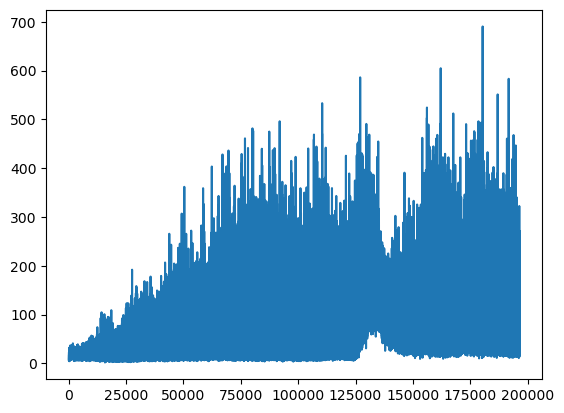

In [95]:
plt.plot(loses_old+loses1+losses)

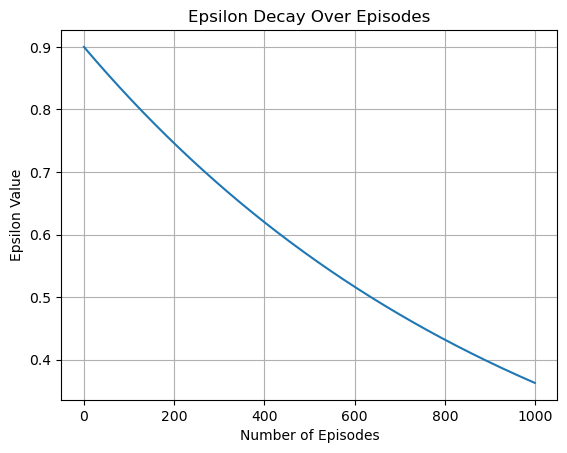

In [1]:
import numpy as np
import matplotlib.pyplot as plt

epsilon_start = 0.9
decrease_epsilon_factor = 1000
epsilon_min = 0.05
n_eps = np.arange(1000)  # Assuming you have 10,000 episodes

epsilon = epsilon_min + (epsilon_start - epsilon_min) * (
                        np.exp(-1. * n_eps / decrease_epsilon_factor))

plt.plot(n_eps, epsilon)
plt.xlabel('Number of Episodes')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay Over Episodes')
plt.grid(True)
plt.show()


#### rewards = eval_agent(agent, env, 20)
# print("")
# print("mean reward after training = ", np.mean(rewards))

In [50]:
agent.epsilon = 0.08

In [39]:
agent.epsilon

0.08

In [27]:
def eval_agent(agent, env, n_sim=5):
    env_copy = deepcopy(env)
    episode_rewards = np.zeros(n_sim)
    for i in range(n_sim):
        state, _ = env_copy.reset()
        reward_sum = 0
        done = False
        print()
        while not done: 
            print(".",end="")
            action = agent.get_best_action(state)
            state, reward, terminated, truncated, _ = env_copy.step(action)
            reward_sum += reward
            done = terminated# or truncated
        episode_rewards[i] = reward_sum
    return episode_rewards

In [28]:
rewards = eval_agent(agent, env, 5 )
print("")
print("mean reward after training = ", np.mean(rewards))


.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

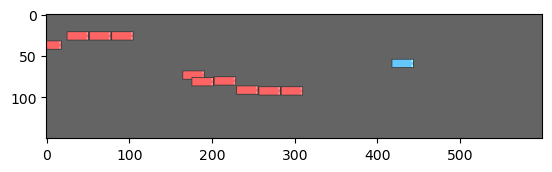

Episode length 350.9901612459061


In [87]:
def run_one_episode(env, agent, display=True):        
    display_env = deepcopy(env)        
    done = False  
    state, _ = display_env.reset()        

    rewards = 0        

    while not done:  
        action = agent.get_best_action(state)  
        print(action)
        state, reward, done, _, _ = display_env.step(action)    
        rewards += reward        
        if display:         
            clear_output(wait=True)        
            plt.imshow(display_env.render())        
            plt.show()        
    if display:        
        display_env.close()        
    print(f'Episode length {rewards}')        
#agent.epsilon = 0.05
env.config['vehicles_density'] = 1.7
run_one_episode(env, agent, display=True) 

In [61]:
agent.epsilon

0.11761334131493678

In [74]:
env.config['vehicles_density'] = 2
env.config['vehicles_density']

C:\Users\Francisco García\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.config to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.config` for environment variables or `env.get_wrapper_attr('config')` that will search the reminding wrappers.
  logger.warn(


2